<a href="https://colab.research.google.com/github/Bratha-Doe/guide/blob/master/tgs1_dataVisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1 Data Visualizasion
* Nama : Gede Dimas Adi Bratha
* NIM  : 180030397

### Import Data





In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
from scipy.cluster import hierarchy

In [114]:
url="https://raw.githubusercontent.com/cornflake15/data-course/main/datasets/melbourne_housing_extra_data.csv"
s=requests.get(url).content
Hframe=pd.read_csv(io.StringIO(s.decode('utf-8')))
Hframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [115]:
Hframe.shape

(19740, 21)

In [116]:
Hframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [117]:
Hframe['Price'].fillna(Hframe.groupby('Regionname')['Price'].transform("median"), inplace=True )

In [119]:
Hframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,767250.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,767250.0,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


### Categorical


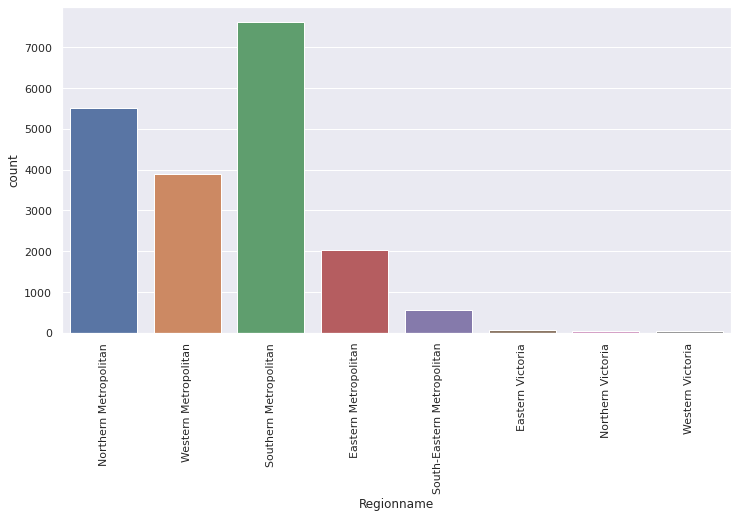

In [124]:
t = sns.countplot(x='Regionname', data=Hframe)
t.set_xticklabels(t.get_xticklabels(), rotation=90);

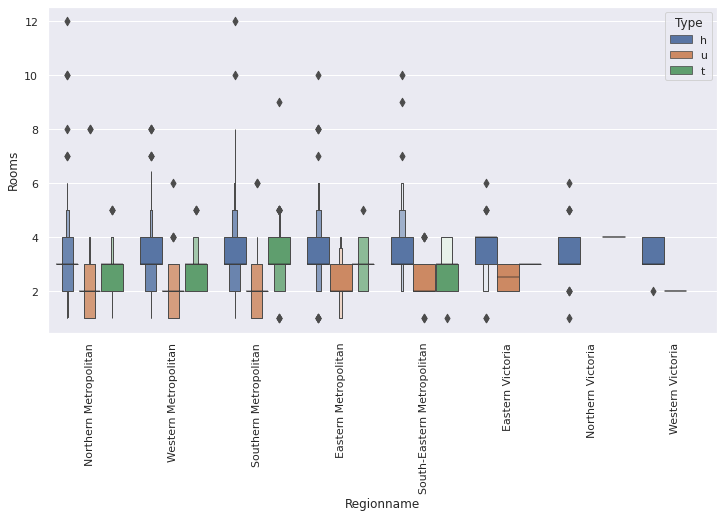

In [121]:
sns.set(rc={'figure.figsize':(12,6)})
r = sns.boxenplot(x='Regionname', y='Rooms', hue='Type', data=Hframe)
r.set_xticklabels(r.get_xticklabels(), rotation=90);

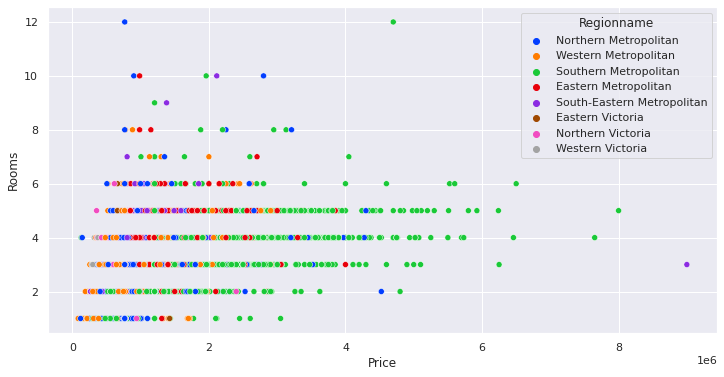

In [122]:
sns.scatterplot(x='Price', y='Rooms', hue='Regionname', data=Hframe, palette='bright')

### Hiraical

In [154]:
df = Hframe.set_index('Regionname')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,68 Studley St,2,h,767250.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,4019.0
Northern Metropolitan,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,4019.0
Northern Metropolitan,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,4019.0
Northern Metropolitan,Abbotsford,18/659 Victoria St,3,u,767250.0,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,4019.0
Northern Metropolitan,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,4019.0


In [155]:
df.drop(columns=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Date', 'Lattitude', 'Longtitude', 'BuildingArea', 'YearBuilt'], inplace=True)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Propertycount
Regionname,,,,,,,,,
Northern Metropolitan,2,767250.0,2.5,3067.0,2.0,1.0,1.0,126.0,4019.0
Northern Metropolitan,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,4019.0
Northern Metropolitan,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,4019.0
Northern Metropolitan,3,767250.0,2.5,3067.0,3.0,2.0,1.0,0.0,4019.0
Northern Metropolitan,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,4019.0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19740 entries, Northern Metropolitan to Western Metropolitan
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          19740 non-null  int64  
 1   Price          19739 non-null  float64
 2   Distance       19732 non-null  float64
 3   Postcode       19732 non-null  float64
 4   Bedroom2       15327 non-null  float64
 5   Bathroom       15327 non-null  float64
 6   Car            15327 non-null  float64
 7   Landsize       14944 non-null  float64
 8   Propertycount  19732 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.1+ MB


In [168]:
newDf = df.fillna(method= 'ffill')
newDf.info

<bound method DataFrame.info of                        Rooms      Price  Distance  ...  Car  Landsize  Propertycount
Regionname                                         ...                              
Northern Metropolitan      2   767250.0       2.5  ...  1.0     126.0         4019.0
Northern Metropolitan      2  1480000.0       2.5  ...  1.0     202.0         4019.0
Northern Metropolitan      2  1035000.0       2.5  ...  0.0     156.0         4019.0
Northern Metropolitan      3   767250.0       2.5  ...  1.0       0.0         4019.0
Northern Metropolitan      3  1465000.0       2.5  ...  0.0     134.0         4019.0
...                      ...        ...       ...  ...  ...       ...            ...
Southern Metropolitan      2   560000.0       4.6  ...  1.0    2010.0         4380.0
Northern Metropolitan      3   525300.0      25.5  ...  2.0    2010.0         2940.0
Western Metropolitan       2   750000.0       6.3  ...  2.0    1999.0         6543.0
Western Metropolitan       6  245

In [162]:
Z = hierarchy.linkage(newDf, 'ward')

AttributeError: ignored

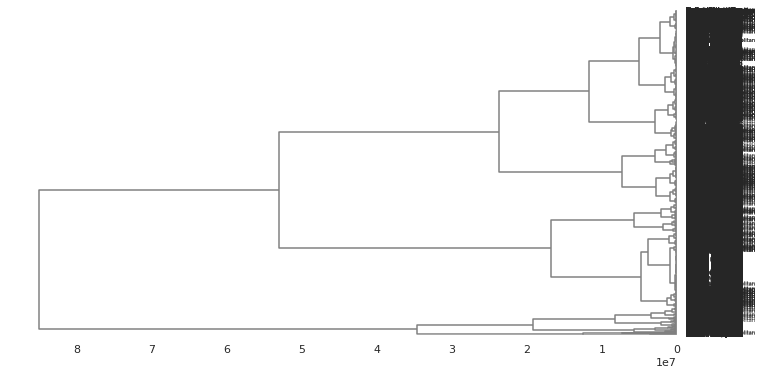

In [171]:
plt.figure()
plot_dendrogram = hierarchy.dendrogram(Z, labels=newDf.index, leaf_rotation=0, orientation='left', color_threshold=240, above_threshold_color='grey')

newDf['Rooms'] = pd.Categorical(newDf['Rooms'])
categorical_color = df['Rooms'].cat.codes

ax = plt.gca()
x_labels = ax.get_ymajorticklabels()

num = -1
for label in x_labels:
    num += 1
    color_value = categorical_color[num]
    lbl.set_color(color_palette(color_value))

### *coba*

In [148]:
#url_dataset = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
#df = pd.read_csv(url_dataset)
#df = df.set_index('model')
#df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [149]:
#Z = hierarchy.linkage(df, 'ward')

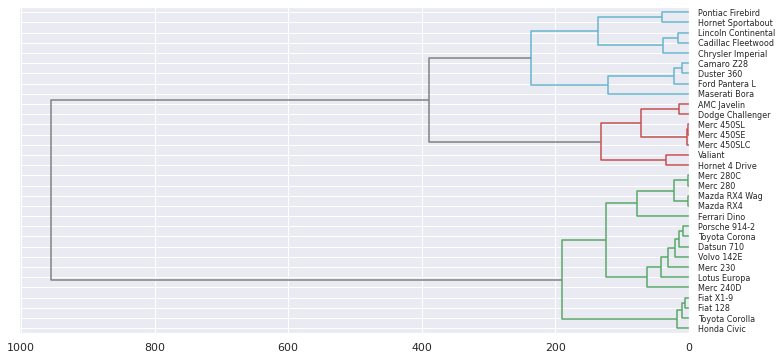

In [152]:
#plt.figure()
#plot_dendrogram = hierarchy.dendrogram(Z, #
#                                 labels=df.index, 
#                                 leaf_rotation=0, 
#                                 orientation='left', 
#                                color_threshold=240, 
#                                 above_threshold_color='grey')
#color_palette = plt.cm.get_cmap('Accent', 3)

# Ubah atribut 'cyl' menjadi categorical, sehingga setiap level akan diberi warna berbeda
#df['cyl'] = pd.Categorical(df['cyl'])
#categorical_color = df['cyl'].cat.codes

#ax = plt.gca()
#x_labels = ax.get_ymajorticklabels()

#num = -1
#for label in x_labels:
#    num += 1
#    color_value = categorical_color[num]